# DS3000 Lecture 15

### Admin: 
- Homework 8 and 9 for this week.
- Lecture 18 (Thursday) will be an optional theoretical lecture on linear algebra. It is not required for this course but if you are interested in the advanced courses, like DS4400 Machine learning, it is highly recommended to take the lecture.
- Project template will be posted for this week, let us know if you have any questions about the projects. 

### Content:
- Regression

# Review for the previous week

|                          | Input Features per sample | Output Features per sample | Supervised | Penguin Example                                                                       |
|:------------------------:|:-------------------------:|:--------------------------:|:----------:|---------------------------------------------------------------------------------------|
|           Classification | 1+ numerical features     | one categorical feature    | True       | Given `body_weight_g`, `flipper_length_mm` estimate `species`                         |
|               Regression | 1+ numerical features     | one continuous feature     | True       | Given `body_weight_g`, `bill_depth_mm` estimate `flipper_length_mm`                   |
|               Clustering | 1+ numerical features     | one categorical feature    | False      | Identify k groups of penguins which have similar `body_weight_g`, `flipper_length_mm` |
| Dimensionality Reduction | N numerical features      | < N numerical features     | False      | Find 2d vector which best represents all 4 of penguin's body/flipper/beak features    |

### K-NN Classifier

- The algorithm for KNN
- The effect of K
- Implement KNN through sci-kit learn
- Evaluation: Cross-validation

# Regression

- What is regression and when to use it?
- Regression model
- Parameters
- Mean of Squared Errors
- Implement regression in Sci-kit learn
- $R^2$
- Regression assumption
- Outliers and Extrapolation

## Regression: Motivation

Can we predict a penguin's `flipper_length_mm` given their `body_mass_g`?

In [10]:
import seaborn as sns
import pandas as pd

df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True)
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


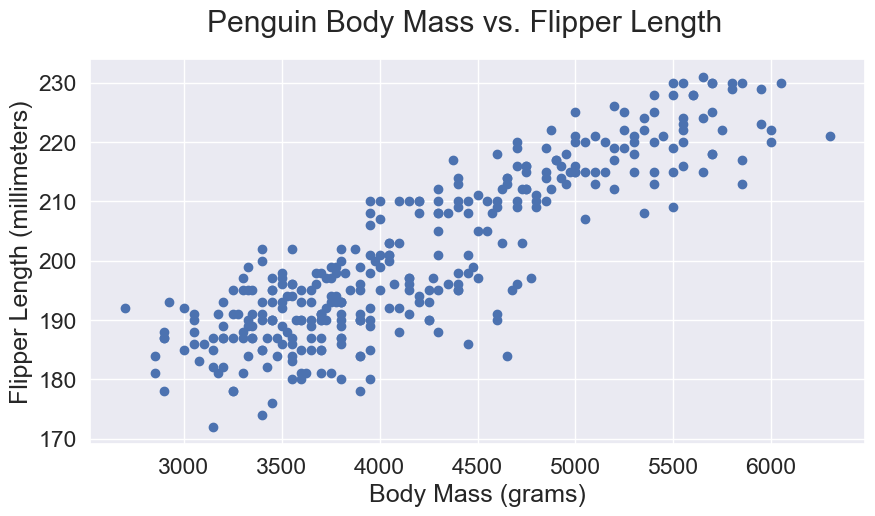

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
plt.scatter(df_penguin['body_mass_g'], df_penguin['flipper_length_mm'])
plt.xlabel('Body Mass (grams)')
plt.ylabel('Flipper Length (millimeters)')
plt.suptitle('Penguin Body Mass vs. Flipper Length')
plt.gcf().set_size_inches(10, 5)

- Regression:
    - predicting a continous number from the input data
- We will predict the flipper length (mm) of penguins based on their body mass (g):
    - higher body mass means longer fipper (intuition)
    - if the model is good, we can save sometime to estimate the flipper leangth without measurement

# What is the model?
## Simple linear regression

Simple linear regression seeks to find coefficients $b_0, b_1$ so that the function:

$$ \hat{y} = b_1 x + b_0 $$

is able to predict $y$ from $x$.
- $x$: input data (body mass of a penguin)
- $y$: output data, outcome, something you want to predict (flipper length)
- $\hat{y}$: estimated output data

To learn the function we
- need to observe some true data $(x, y)$
- find the best coefficient $b_i$ such that it maps x to y


## Linear Regression: 2 point example (trivial)

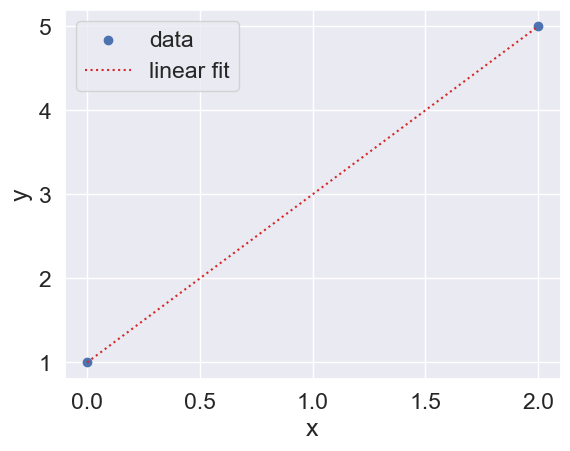

In [12]:
# points (0, 1) and (2, 5)
x = [0, 2]
y = [1, 5]

plt.scatter(x, y, label='data')

plt.plot(x, y, ls=':', color='tab:red', label='linear fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## How do we find $b_1$ and $b_0$ that describe the line?

Remember our model:

$$ \hat{y} = b_1 x + b_0 $$

(0,1) and (2,5)
1 = b1*0 + b0
5 = b1*2 + b0
b0 = 1
5 = 2*b1 + 1
b1 = (5-1)/2 = 2
y = 2*x + 1

# What do $b_1$ and $b_0$ mean?

## Algebraic meaning:
- $b_1$: the slope of the line
    - when x increases by 1 unit, how much does y change
- $b_0$: the y-intercept of the line
    - when x = 0, what value is y?
   
## Application meaning:
Returning to our penguin example where:
- x is the body mass (g)
- y is the flipper length (mm)


- b1: the increase of flipper length (mm) when the body mass increase by one unit (g)
- b0: when the body mass is 0, what is the flipper length
- **Note:** In pratcial term, the intercept can be meaningless

## Almost always, there is no $b_1$ and $b_0$ which "fit" every observation...

Specifying $b_1$ and $b_0$ is equivilent to specifying a straight line.  

Can we fit a straight line through all these observations?

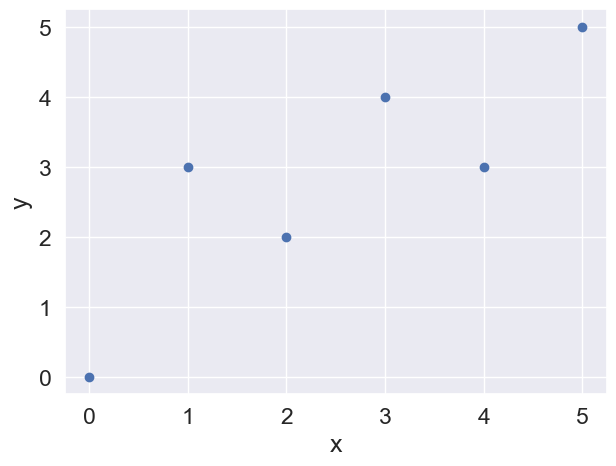

In [13]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 3, 2, 4, 3, 5]

plt.scatter(x, y)
plt.gcf().set_size_inches(7, 5)
plt.xlabel('x')
plt.ylabel('y');

## ... lets find the line which "best" fits these points

### In this case:
- ground truth: 
    - $y_i$ the y position for the sample i
- estimates: 
    - $\hat{y_i}$ the estimated y position of sample i

### How to choose $b_i$ when data can't be fit with a straight line
1. Build some model of the data
    - $b_1 x + b_0 = \hat{y}$
    - remember the $b_i$ coefficients define the position of the line above
1. Quantify what a "good" model is 
1. `.fit()` the model parameters to maximize how "good" the model is

The error of the j-th data point is the distance between our estimate $\hat{y}$ and the observed $y$.

$$\texttt{Error}_j = e_j = \hat{y}_j - y_j = b_1 x_j + b_0 - y_j$$

This definition "Mean of Squared Errors" is more than a name, its a recipe:

- "Mean of squared errors" (MSE) meansure how close a line comes to all observations
- If MSE = 0, means the line go through all of the points
- IF MSE is large, it means the linear is far away from many data points

**The best line ($b_1$ and $b_0$) is the one that minimize the MSE**

How to compute MSE:
1. Compute the error of every observation
1. Square each error
1. Compute average of all squared errors


### Mean of Squared Errors (MSE)
Before formally defining **Mean of Squared Error (MSE)**, lets build our intuition of it:
- MSE measures how closely a line (i.e. $b_1, b_0$) comes to all observations $(x, y)$
- MSE is 0 when the line goes through all points exactly
    - in other words, some $b_1, b_0$ has, for every pair $(x, y)$:
    $$\hat{y} = b_1 x + b_0 = y $$
    - our trivial 2 observation example is like this, as will be all 2 observation data sets
- MSE is large when the line is far from many pairs $(x, y)$

**The best line $(b_1, b_0)$ is the one which minimizes MSE**

### Formal definition of MSE

$$
    MSE = \frac{1}{n}\sum_{j} {(\hat{y}_j - y_j)^2} = \frac{1}{n} \sum_{j} e_{j}^2
$$

where 
- $(x_j, y_j)$ are the paired observations
- n is the total number of paired observations
- $j$ is the observation index 
    - (first observation is 0, next is 1, ...)

In [14]:
import numpy as np

def get_mse(y_true, y_pred):
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_pred - y_true) ** 2)

def show_fit(x, y, slope, intercept):
    plt.figure()
    
    # transform the input data into numpy arrays and flatten them for easier processing
    x = np.array(x).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    # for each data point plot the error
    for idx, (x_i, y_i) in enumerate(zip(x, y)):
        plt.plot([x_i, x_i], [y_i, slope * x_i + intercept], 
                 ls='--', lw=3, color='tab:red',
                 label='error' if idx == 0 else "")
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.2f} * x + {intercept:.2f}, MSE = {mse:.3f}')
 

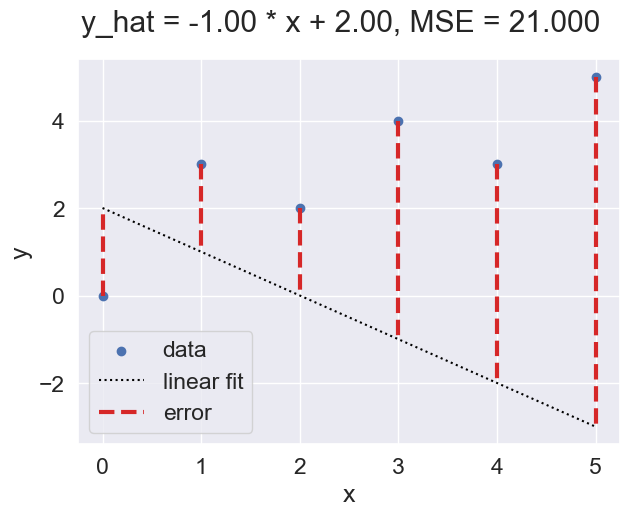

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)

x = [0, 1, 2, 3, 4, 5]
y = [0, 3, 2, 4, 3, 5]

show_fit(x, y, slope=-1, intercept=2)

plt.gcf().set_size_inches(7, 5)

## Is an MSE = 21 good for these points? i.e. is $\hat{y} = -1 x + 2$ the best line?

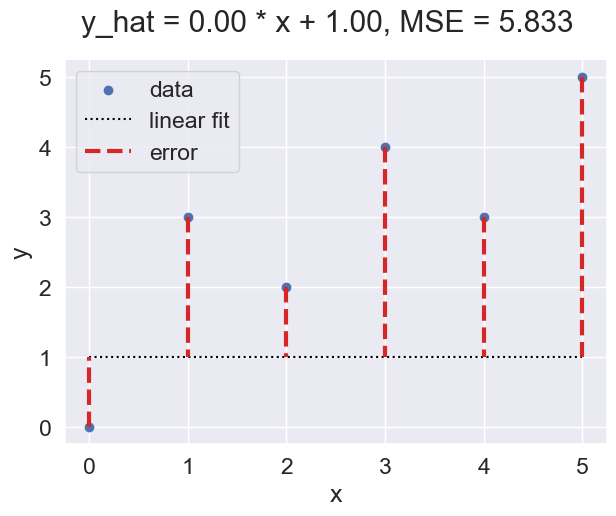

In [16]:
x = [0, 1, 2, 3, 4, 5]
y = [0, 3, 2, 4, 3, 5]
show_fit(x, y, 0, 1)

plt.gcf().set_size_inches(7, 5)

##  Looks like $\hat{y} = 0 x + 1$ is better, but is it the best?

In [17]:
# can calculate the MSE "by hand" easily here
error = np.array([1, -2, -1, -3, -2, -4])
error_sq = error**2
mse = np.mean(error_sq)
mse

5.833333333333333

## How can we avoid guessing and checking and find the best $b_0, b_1$?

We can use the `LinearRegression` function from `sklearn`, however we have to be a little careful. Something like this:

```python
from sklearn.linear_model import LinearRegression

x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 3, 2, 4, 3, 5])

reg = LinearRegression()
reg.fit(x, y)
slope = reg.coef_[0]
intercept = reg.intercept_
```

yields

    ValueError: Expected 2D array, got 1D array instead:
    array=[0 1 2 3 4 5].
    Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
    
Because the input $x$ of all our sklearn models must have shape (n_samples, n_features) but:


In [18]:
x = np.array([0, 1, 2, 3, 4, 5])
x.shape

(6,)

this is a 1d array, sklearn can't identify whether its:
- a single sample with 6 distinct features? (no)
- 6 distinct samples each with one feature? (yes)

In [19]:
x = x.reshape((6,1))
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
(6, 1)


In [21]:
from sklearn.linear_model import LinearRegression

x = np.array([0, 1, 2, 3, 4, 5]).reshape((6,1))
y = np.array([0, 3, 2, 4, 3, 5])

reg = LinearRegression()

reg.fit(x,y)

slope = reg.coef_[0]
intercept = reg.intercept_

0.7714285714285715
0.9047619047619049


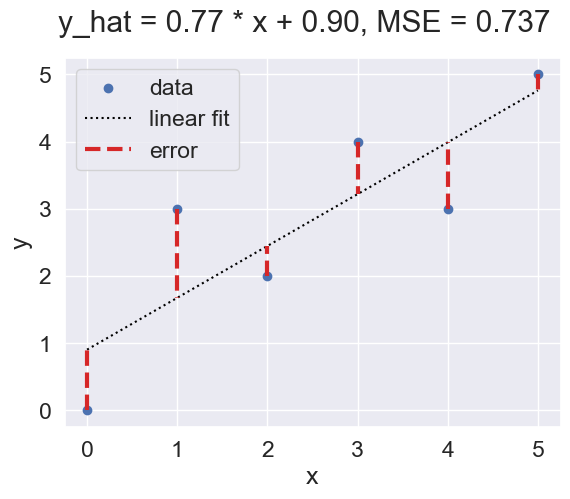

In [23]:
print(slope)
print(intercept)

show_fit(x,y,slope, intercept)

So, How can we avoid guessing and checking and find the best $b_0, b_1$? We use `LinearRegression` function from `sklearn`.

Another question arises, however:

## What is the relationship between MSE and the sample variance of y?

Remember,
$$
    MSE = \frac{1}{n}\sum_j{( \hat{y_j} - y_j)^2}
$$

Look familiar?
$$\sigma^2 = \frac{1}{n}\sum_j{(\bar{y} - y_j)^2} $$
where $\bar{y}$ is the mean of our observed samples of $y$.


**Sample variance is the MSE of a line which predicts each $\hat{y}_j = \bar{y}$**

What kind of line would give the same prediction (the sample mean) for each sample?
- a horizontal line at the sample mean:

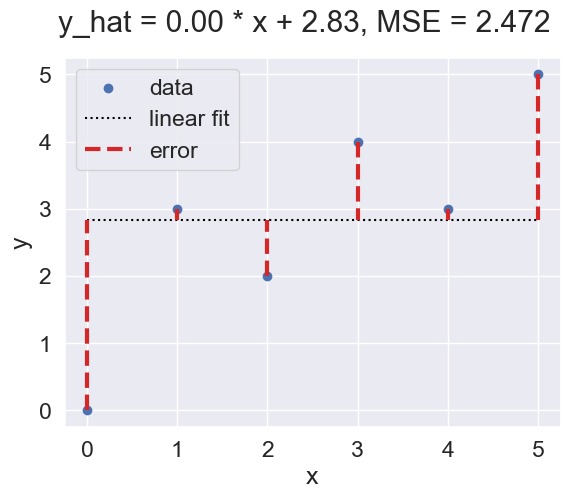

In [24]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 3, 2, 4, 3, 5])
y_mean= y.mean()
show_fit(x, y, slope = 0, intercept = y_mean)


In [25]:
np.var(y)

2.4722222222222228

## An Intuition Honing Example: MSE and Variance of Y

Whats the minimum MSE of predicting $\hat{y} = b_1 x + b_0$ where:
- y = stock price increase on a given day
- x = number of coffees consumed by CEOs parents on the same day

1. As x increases, we don't observe changes in y
    - assume: x and y uncorrelated
1. Therefore, slope = $b_1 = 0$
1. To minimize MSE our best y prediction is to assign intercept = $b_0 = \bar{y}$
1. From above, an estimate of MSE of this model is sample variance: `np.var(y)`

# MSE and Variance: The Punchline

This definition suggests that we might "factor" the variance of Y into two components:

    MSE = variance in y that unexplained by the model

    total_variance of y = variance in y explained by the model + variance in y unexplained by the model
     = variance in y explained by the model + MSE


var of y expained by the model / total variance = 
                        1 - MSE/total variance = R^2

## $R^2$ is the percentage of variance of y can be explained by the model

"Algebraic" motivation

$$R^2 = 1-\frac{MSE}{\sigma_y^2}$$

$R^2$ is the percent of variance of y explained by x (under model)

Intuition:
- $R^2 = 0$
    - x, using this model, doesn't explain any of the variance of y
- $R^2 = .5$
    - x, using this model, explains half the variance of y
- $R^2 = 1$
    - x, using this model, explains all the differences in y

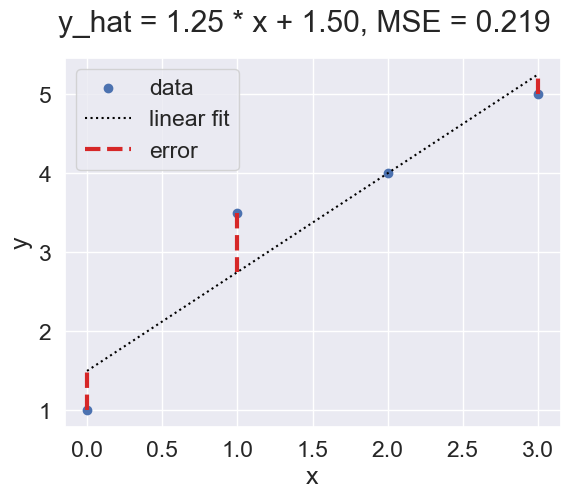

In [28]:
x = np.array([0, 1, 2, 3]).reshape(-1, 1) # we can use -1 instead of 4 (good when we may not know the exact number of obs)
y = np.array([1, 3.5, 4, 5])

reg = LinearRegression()
reg.fit(x,y)

slope = reg.coef_[0]
intercept = reg.intercept_

show_fit(x, y, slope, intercept)

y_pred = reg.predict(x)


In [29]:
# computing R2 from our formula

R2 = 1 - (get_mse(y_pred, y)/np.var(y))
R2

0.8992805755395684

In [30]:
from sklearn.metrics import r2_score

r2_score(y_true = y, y_pred = y_pred)

0.8992805755395684

## Why is it $R^2$? What's $R$ then?


In [31]:
R = np.sqrt(R2)
R

0.948304052263602

In [32]:
np.corrcoef(y, y_pred)

array([[1.        , 0.94830405],
       [0.94830405, 1.        ]])

# Another interpretation/way to calculate $R^2$

**Note: ** this is only true for the simple linear regression (one x-feature, one y-feature)

$$R^2 = \text{Correlation}^2$$
$$\text{Correlation} = sign(b_1)\sqrt{R^2}$$

**Note also:** $R^2$ cannot be trusted if the relationship is not linear

## Whats a 'good' $R^2$ value?

... it depends:

- if you're predicinting price changes in stock market: cross validated $R^2 = .01$ is fantastic!
    - if you keep using your model to make bets, you'll come out ahead, even if only slightly
- if you're predicting the flipper length of a penguin (y) given body mass (x): cross validated $R^2 = .01$ is not so great
    - knowing the body mass doesn't really help your prediction more than guessing would
    
    
More generally, $R^2$ should be interpreted in the context of the application.  Like Accuracy, its context dependent:

- baseball player who "accurately" gets base hit 50% of at-bats is better than any hitter to ever play the game
- pilot who "accurately" lands the plan without crashing 50% of the time might not be as celebrated ...

# Let's do it with the penguin data

Using the penguin data, Predict y=`flipper_length_mm` from x=`body_mass_g` by ...
1. `.fit()` a LinearRegression to predict y from x
1. visually inspect your results using `show_fit()`
1. print the following values to describe your prediction
    - slope 
    - intercept
    - mse
    - r2
1. Repeat the three steps above for each new x value below.  (Use a loop)
    - x=`bill_depth_mm`
    - x=`bill_length_mm`
    
Answer the following questions
1. Which of the three features, `body_mass_g`, `bill_depth_mm` or `bill_length_mm` best predicts changes in `flipper_length_mm`?
1. What does the slope of the best model mean in the context of the question (as if you were explaining to a non-technical audience)?
1. Can we trust these results?

In [33]:
from sklearn.linear_model import LinearRegression

x_names = ['body_mass_g', 'bill_depth_mm', 'bill_length_mm']
x_list = []
slope_list = []
intercept_list = []

for xl in x_names:
    x = np.array(df_penguin[xl]).reshape((-1,1))
    x_list.append(x)
    y = np.array(df_penguin['flipper_length_mm'])

    reg = LinearRegression()
    reg.fit(x, y)

    slope_list.append(reg.coef_[0])
    intercept_list.append(reg.intercept_)

In [34]:
print(slope_list)
print(intercept_list)

[0.015195264815217666, -4.112353729260951, 1.6738325692522746]
[137.03962089225467, 271.55496300625424, 127.33039757802365]


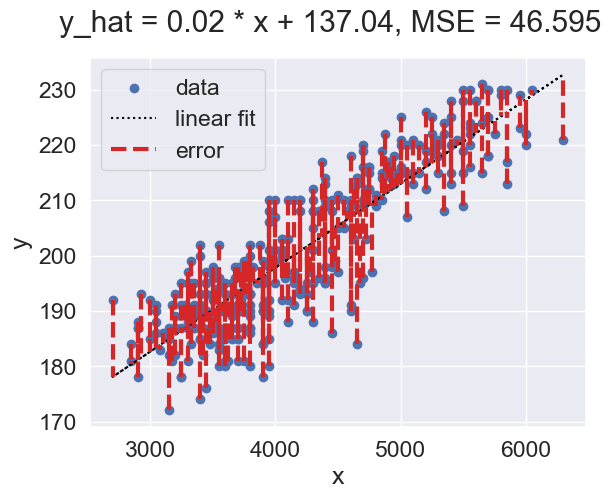

In [35]:
#for the body mass
show_fit(x_list[0], y, slope_list[0], intercept_list[0])

In [36]:
y_pred_bodymass = slope_list[0] * x_list[0] + intercept_list[0]
r2_score(y_true = y, y_pred = y_pred_bodymass)

0.7620921573403914

0.33384324435560986

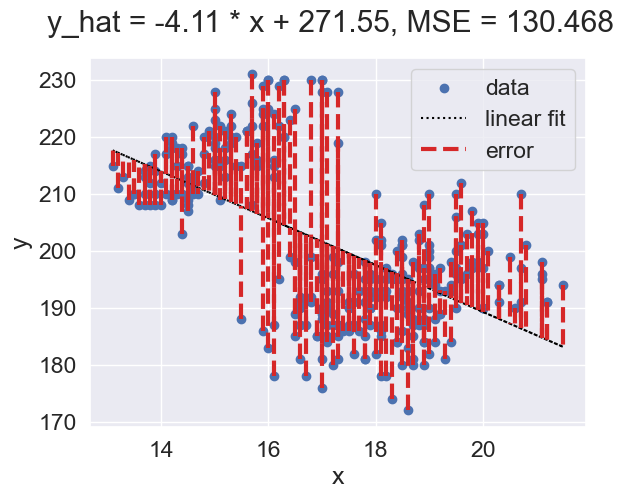

In [37]:
# bill_depth

show_fit(x_list[1], y, slope_list[1], intercept_list[1])
y_pred_billdepth = slope_list[1] * x_list[1] + intercept_list[1]
r2_score(y_true = y, y_pred = y_pred_billdepth)

0.4265339132459688

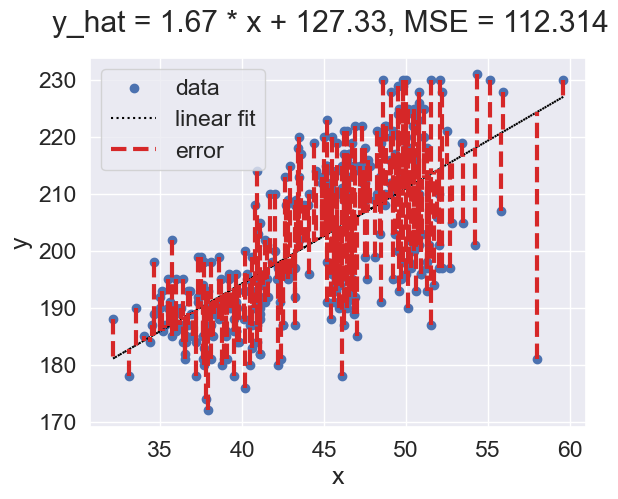

In [38]:
# bill length

show_fit(x_list[2], y, slope_list[2], intercept_list[2])
y_pred_billlength = slope_list[2] * x_list[2] + intercept_list[2]
r2_score(y_true = y, y_pred = y_pred_billlength)

In [40]:
slope_list[0]

0.015195264815217666

The slope can be interepreted as : every gram heavier a penguin is, we predict their flipper length to be 0.015 mm longer

# So, we've built a model that seems to do a decent job of predicting `flipper_length_mm` with `body_mass_g`: Can we trust it?

There are two things we should do to be able to answer this question. The first we've discussed:

- **Cross Validation**: while we don't illustrate its use here (as I will ask you to implement it on your homework), we should perform k-fold cross validation to get a better understanding of $R^2$. It works exactly as it did for k-NN or Random Forests: convert the fold the data into k subsets. Iterate through, holding out one subset as a test set, fitting the linear regression on the others as a training set, predict the y-feature for the test set. The resulting $R^2$ will be a more trustworthy measurement of how well the model will predict new observations.  
- **Understand Assumptions**: there are certain assumptions we make about simple linear regression that we haven't discussed yet. Namely that the errors ($e_j$) not only are as small as possible on average (hence, minimizing the MSE) but also that they follow certain rules. In fact, there are three key assumptions that we must check in order to say we can trust these results:

1. The errors $e_j$ are independent
    - in other words, the observations themselves are independent; if they aren't then any results we get from the model may be misleading, because a trend we see may simply exist because some of the observations are related to each other
2. The errors $e_j$ vary constantly (also: linearity of the model)
    - in other words, if there is some pattern in how the errors behave, it indicates there is some pattern in the observations we have not taken into account; i.e. that the true relationship between x and y is not strictly linear (and this *is* **linear** regression, after all)
3. The errors $e_j$ follow a normal probability distribution
    - in other words, we expect most of the errors to be near zero, and an approximately equal number to be positive/negative
    
### You may NOT report results from conducting linear regression without checking these assumptions and verifying that they are met. If they are not met, you may still report the results, but you must acknowledge that they may be misleading

## Checking Independence

We can check if the errors are indpendent by plotting them in the order of the observations; if we see any patterns, it suggests there is some dependency between observations

Text(0, 0.5, 'errors')

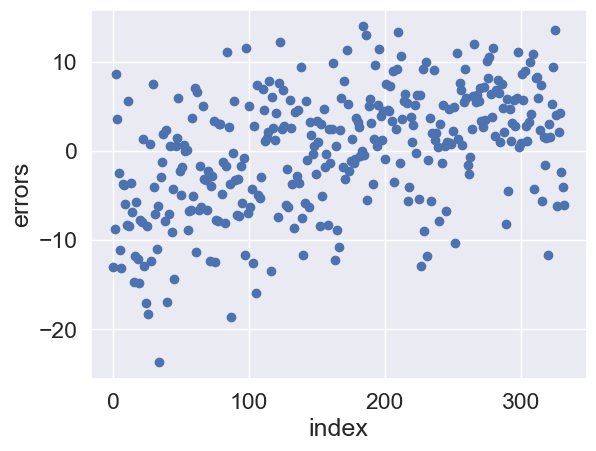

In [43]:
# plot a scatter plot of the errors in order

error = y.reshape((-1, 1)) - y_pred_bodymass
plt.scatter(x = range(len(y)), y = error)
plt.xlabel('index')
plt.ylabel('errors')

The errors tend to be lower in the first half of the data and higher in the second half of the data, which indicates the errors are not independent. This suggests that Adelie penguins are being predicted with smaller flipper length than the others. 

### How to fix?

It usually means there are some other features may affect the target value. You may need to include more features in the model (mulitple linear regression)

## Checking Constant Variance\Linearity

We can check if the errors vary constantly by plotting them over the values of our x-feature; if we see any patterns, especially curving or tunnel/funnel shapes, it suggests the variance is non-constant or that the relationship is not truly linear

Text(0, 0.5, 'errors')

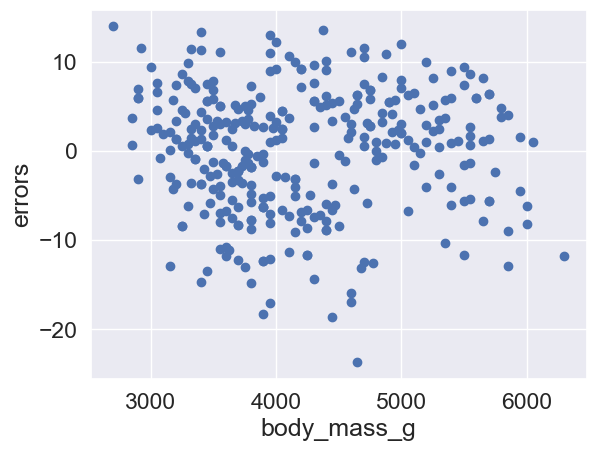

In [44]:
# plot a scatter plot of the errors over x

plt.scatter(x = x_list[0], y = error)
plt.xlabel('body_mass_g')
plt.ylabel('errors')

There seems to eb a fair random scatter as we move from left to right

#### How to fix?
(If you do have the fan-out shape in the scatter plot). It is usually hard to fix. One of the simple way to fix it, is to take a transform on the y value, may be you can consider polynomial regression. 


## Checking Normality

We can check if the errors are normally distributed by plotting their observed quantiles against the expected quantiles of a theoretical normal distribution; if we see an approximately straight, 45 degree line, it means our errors are normal, if it's really off, there's a problem!

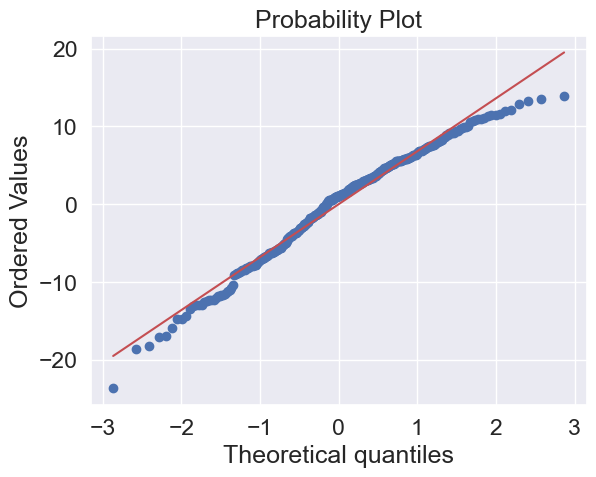

In [46]:
# the two modules below will help us plot our error QQ probabiliy plot (QQ = Quantile-Quantile)
# may need to pip install scipy
import pylab as py
import scipy.stats as stats

## QQ-plot
stats.probplot(error.reshape(-1,), dist = 'norm', plot = py)
py.show()

#### How to fix?



# (Likely next time) Lecture Break/Practice 2
### Solution in `day16_lecturebreaksols.ipynb`

Use the `evdataset.csv` from the Homework module on Canvas. Let us see if we can use linear regression to predict an electric vehicle's `Top Speed` (in kilometers per hour)  based on `Acceleration` (in seconds (time to go from 0 to 100 Km per hr)).

1. Use `LinearRegression()` to fit the data, get the slope and intercept, and `reg.predict(x)` to get the `y_pred` predictions
2. Use `show_fit()` to plot the graph, display the best fit line and MSE
    - Interpret the slope in the context of the problem
3. Use `r2_score()` to calculate $R^2$ and interpret it
4. Check the three assumptions of independence, constant variance, and normality
5. Make a recommendation on next steps; can we use this model to predict an EV's Top Speed? Should we try something else? Give up?


In [38]:
df_ev = pd.read_csv('evdataset.csv', index_col='id')
df_ev.head()

,Drive,Acceleration,Top Speed,Electric Range,Total Power,Total Torque,Battery Capacity,Charge Speed,Length,Width,Height,Wheelbase,Gross Weight
id,,,,,,,,,,,,,
1647,Rear,7.8,185,390,168,350,77.4,49,4515,1890,1580,2900,2495
1493,AWD,6.2,160,330,215,520,69.7,46,4684,1834,1701,2829,2580
1229,AWD,3.2,260,415,500,850,93.4,46,4963,1966,1381,2900,2880
1252,Rear,5.7,190,470,250,430,83.9,54,4783,1852,1448,2856,2605
1534,Rear,7.9,160,450,150,310,82.0,55,4261,1809,1568,2771,2300
